# Fitting a model to data with both x and y errors with `BILBY`

Usually when we fit a model to data with a Gaussian Likelihood we assume that we know x values exactly. This is almost never the case. Here we show how to fit a model with errors in both x and y.

In [1]:
import bilby
import inspect
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### First we create the data and plot it

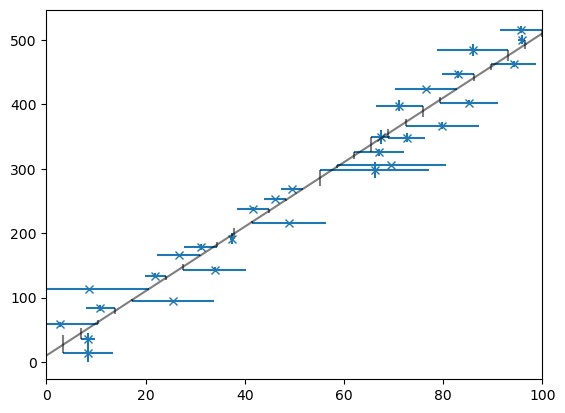

In [2]:
#define our model, a line
def model(x, m, c, **kwargs):
    y = m*x + c
    return y

#make a function to create and plot our data
def make_data(points, m , c, xerr, yerr, seed):
    np.random.seed(int(seed))
    xtrue = np.linspace(0,100,points)
    ytrue = model(x = xtrue, m = m, c = c)

    xerr = xerr * np.random.randn(points)
    yerr = yerr * np.random.randn(points)
    xobs = xtrue + xerr
    yobs = ytrue + yerr
    
    plt.errorbar(xobs, yobs, xerr = xerr, yerr = yerr, fmt = 'x')
    plt.errorbar(xtrue, ytrue, yerr = yerr, color = 'black', alpha = 0.5)
    plt.xlim(0,100)
    plt.show()
    
    data = {'xtrue': xtrue, 'ytrue':ytrue, 'xobs':xobs, 'yobs':yobs, 'xerr':xerr, 'yerr':yerr}
    
    return data

data = make_data(points = 30, m = 5, c = 10, xerr = 5, yerr = 5, seed = 123)

### Now lets set up the prior and bilby output directory

In [3]:
#setting up bilby priors
priors = dict(m=bilby.core.prior.Uniform(0, 30, 'm'),
              c=bilby.core.prior.Uniform(0, 30, 'c'))

outdir = 'outdir'
livepoints = 100
walks = 100

### Our first step is to recover the straight line using a simple Gaussian Likelihood that only takes into account the y errors. Under the assumption we know x exactly. In this case, we pass in xtrue for x

In [4]:
OneDGaussian_knownx = bilby.core.likelihood.GaussianLikelihood(x = data['xtrue'], y = data['yobs'], func = model, sigma = data['yerr'])
result_1D_xtrue = bilby.run_sampler(
    likelihood=OneDGaussian_knownx, priors=priors, sampler='dynesty', npoints=livepoints,
    walks=walks, outdir=outdir, label='xtrue_1D_Gaussian')

15:41 bilby INFO    : Running for label 'xtrue_1D_Gaussian', output will be saved to 'outdir'
15:41 bilby INFO    : Analysis priors:
15:41 bilby INFO    : m=Uniform(minimum=0, maximum=30, name='m', latex_label='m', unit=None, boundary=None)
15:41 bilby INFO    : c=Uniform(minimum=0, maximum=30, name='c', latex_label='c', unit=None, boundary=None)
15:41 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
15:41 bilby INFO    : Analysis likelihood noise evidence: nan
15:41 bilby INFO    : Single likelihood evaluation took 1.107e-04 s
15:41 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 100, 'bound': 'multi', 'sample': 'rwalk', 'periodic': None, 'reflective': None, 'update_interval': None, 'first_update': None, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'gradient': None, 'grad_args': None, 'grad_

1it [00:00, ?it/s]

15:42 bilby INFO    : Written checkpoint file outdir/xtrue_1D_Gaussian_resume.pickle
15:42 bilby INFO    : Sampling time: 0:00:48.385689


<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject
15:42 bilby INFO    : Summary of results:
nsamples: 1859
ln_noise_evidence:    nan
ln_evidence: -88.251 +/-  0.437
ln_bayes_factor:    nan +/-  0.437



In [5]:
result_1D_xtrue.plot_corner(truth=dict(m=5, c = 10), titles = True)
result_1D_xtrue.plot_with_data(model = model, x = data['xtrue'], y = data['yobs'], ndraws=1000, npoints=100)
plt.show()

15:42 bilby INFO    : Plotting 1000 draws
15:42 bilby INFO    : Plotting maximum likelihood


### As expected this is easy to recover and the sampler does a good job. However this was made too easy - by passing in the 'true' values of x. Lets see what happens when we pass in the observed values of x

In [6]:
OneDGaussian_unknownx = bilby.core.likelihood.GaussianLikelihood(x = data['xobs'], y = data['yobs'], 
                                                                 func = model, sigma = data['yerr'])
result_1D_xobs = bilby.run_sampler(
    likelihood=OneDGaussian_unknownx, priors=priors, sampler='dynesty', npoints=livepoints,
    walks=walks, outdir=outdir, label='xobs_1D_Gaussian')

15:43 bilby INFO    : Running for label 'xobs_1D_Gaussian', output will be saved to 'outdir'
15:43 bilby INFO    : Analysis priors:
15:43 bilby INFO    : m=Uniform(minimum=0, maximum=30, name='m', latex_label='m', unit=None, boundary=None)
15:43 bilby INFO    : c=Uniform(minimum=0, maximum=30, name='c', latex_label='c', unit=None, boundary=None)
15:43 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
15:43 bilby INFO    : Analysis likelihood noise evidence: nan
15:43 bilby INFO    : Single likelihood evaluation took 1.118e-04 s
15:43 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 100, 'bound': 'multi', 'sample': 'rwalk', 'periodic': None, 'reflective': None, 'update_interval': None, 'first_update': None, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'gradient': None, 'grad_args': None, 'grad_k

1it [00:00, ?it/s]

15:44 bilby INFO    : Written checkpoint file outdir/xobs_1D_Gaussian_resume.pickle
/home/useradd/anaconda3/envs/py39/lib/python3.9/site-packages/dynesty/plotting.py:318: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
15:44 bilby INFO    : Sampling time: 0:00:58.538697


15:44 bilby INFO    : Summary of results:
nsamples: 2845
ln_noise_evidence:    nan
ln_evidence: -3119014.073 +/-  0.564
ln_bayes_factor:    nan +/-  0.564



In [7]:
result_1D_xobs.plot_corner(truth=dict(m=5, c = 10), titles = True)
result_1D_xobs.plot_with_data(model = model, x = data['xobs'], y = data['yobs'], ndraws=1000, npoints=100)
plt.show()

15:45 bilby INFO    : Plotting 1000 draws
15:45 bilby INFO    : Plotting maximum likelihood


### As expected, this is significantly worse. Let us now define a new likelihood which takes into account x errors but you also pass in xtrue

In [8]:
class TwoDGaussianLikelihood_knownxtrue(bilby.Likelihood):
    def __init__(self, xtrue, xobs, yobs, xerr, yerr, function):
        """

        Parameters
        ----------
        xtrue: array_like 
            The true injected x values
        xobs, yobs: array_like
            The data to analyse
        xerr, yerr: array_like
            The standard deviation of the noise
        function:
            The python function to fit to the data
        """
        self.xobs = xobs
        self.xtrue = xtrue
        self.yobs = yobs
        self.yerr = yerr
        self.xerr = xerr
        self.function = function
        parameters = inspect.getargspec(function).args
        parameters.pop(0)
        self.parameters = dict.fromkeys(parameters)
        self._marginalized_parameters = list()

    def log_likelihood(self):
        resy = self.yobs - self.function(self.xtrue, **self.parameters)
        resx = self.xobs - self.xtrue
        return -0.5 * (np.sum(((resy) / self.yerr) ** 2) + np.sum(((resx) / self.xerr) ** 2))

In [9]:
TwoDGaussian_knownx = TwoDGaussianLikelihood_knownxtrue(xtrue = data['xtrue'], xobs = data['xobs'], 
                                                        yobs = data['yobs'], xerr=data['xerr'], 
                                                        yerr = data['yerr'], function=model)
result_2D_knownx = bilby.run_sampler(
    likelihood=TwoDGaussian_knownx, priors=priors, sampler='dynesty', npoints=livepoints,
    walks=walks, outdir=outdir, label='knownx_2D_Gaussian')

/tmp/ipykernel_2165/2097893589.py:22: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  parameters = inspect.getargspec(function).args
18:46 bilby INFO    : Running for label 'knownx_2D_Gaussian', output will be saved to 'outdir'
18:46 bilby INFO    : Analysis priors:
18:46 bilby INFO    : m=Uniform(minimum=0, maximum=30, name='m', latex_label='m', unit=None, boundary=None)
18:46 bilby INFO    : c=Uniform(minimum=0, maximum=30, name='c', latex_label='c', unit=None, boundary=None)
18:46 bilby INFO    : Analysis likelihood class: <class '__main__.TwoDGaussianLikelihood_knownxtrue'>
18:46 bilby INFO    : Analysis likelihood noise evidence: nan
18:46 bilby INFO    : Single likelihood evaluation took 5.105e-05 s
18:46 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 100, 'bound': 'multi', 'sample': 'rwalk', 'periodic': None, 'reflective': None, 'update_interval': None, 'first_update': None, 'npdim': None

1it [00:00, ?it/s]

18:46 bilby INFO    : Written checkpoint file outdir/knownx_2D_Gaussian_resume.pickle
18:46 bilby INFO    : Sampling time: 0:00:41.492774
18:46 bilby INFO    : Summary of results:
nsamples: 1926
ln_noise_evidence:    nan
ln_evidence: -45.457 +/-  0.448
ln_bayes_factor:    nan +/-  0.448



In [12]:
result_2D_knownx.plot_corner(truth=dict(m=5, c = 10), titles = True)
result_2D_knownx.plot_with_data(model = model, x = data['xobs'], y = data['yobs'], ndraws=1000, npoints=100)
plt.show()

20:09 bilby INFO    : Plotting 1000 draws
20:09 bilby INFO    : Plotting maximum likelihood


### This works well, however it still is not realistic as one still needs to 'know' the true x values. Getting around this requires marginalisation of the true x values or sampling over them.  See discussion in section 7 of https://arxiv.org/pdf/1008.4686.pdf

In [14]:
class TwoDGaussianLikelihood_unknownx(bilby.Likelihood):
    def __init__(self, xobs, yobs, xerr, yerr, function):
        """

        Parameters
        ----------
        xobs, yobs: array_like
            The data to analyse
        xerr, yerr: array_like
            The standard deviation of the noise
        function:
            The python function to fit to the data
        """
        self.xobs = xobs
        self.yobs = yobs
        self.yerr = yerr
        self.xerr = xerr
        self.function = function
        parameters = inspect.getargspec(function).args
        parameters.pop(0)
        self.parameters = dict.fromkeys(parameters)
        self._marginalized_parameters = list()

    def log_likelihood(self):
        m = self.parameters['m']
        v = np.array([-m, 1.0])
        
        Sigma2 = (self.xerr*m)**2 + self.yerr**2
        model_y = self.function(self.xobs, **self.parameters)
        Delta = self.yobs - model_y

        ll = -0.5 * np.sum(Delta**2 / Sigma2 + np.log(Sigma2))
                
        return ll

In [15]:
TwoDGaussian_unknownx = TwoDGaussianLikelihood_unknownx(xobs = data['xobs'], yobs = data['yobs'], 
                                                        xerr= data['xerr'], yerr = data['yerr'],
                                                        function=model)
result_2D_unknownx = bilby.run_sampler(
    likelihood=TwoDGaussian_unknownx, priors=priors, sampler='dynesty', npoints=livepoints,
    walks=walks, outdir=outdir, label='unknownx_2D_Gaussian')

/tmp/ipykernel_2165/2779546879.py:19: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  parameters = inspect.getargspec(function).args
20:09 bilby INFO    : Running for label 'unknownx_2D_Gaussian', output will be saved to 'outdir'
20:10 bilby INFO    : Analysis priors:
20:10 bilby INFO    : m=Uniform(minimum=0, maximum=30, name='m', latex_label='m', unit=None, boundary=None)
20:10 bilby INFO    : c=Uniform(minimum=0, maximum=30, name='c', latex_label='c', unit=None, boundary=None)
20:10 bilby INFO    : Analysis likelihood class: <class '__main__.TwoDGaussianLikelihood_unknownx'>
20:10 bilby INFO    : Analysis likelihood noise evidence: nan
20:10 bilby INFO    : Single likelihood evaluation took 1.068e-04 s
20:10 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 100, 'bound': 'multi', 'sample': 'rwalk', 'periodic': None, 'reflective': None, 'update_interval': None, 'first_update': None, 'npdim': None

1it [00:00, ?it/s]

20:10 bilby INFO    : Written checkpoint file outdir/unknownx_2D_Gaussian_resume.pickle
20:10 bilby INFO    : Sampling time: 0:00:12.944703
20:10 bilby INFO    : Summary of results:
nsamples: 942
ln_noise_evidence:    nan
ln_evidence: -116.043 +/-  0.266
ln_bayes_factor:    nan +/-  0.266



In [16]:
result_2D_unknownx.plot_corner(truth=dict(m=5, c = 10), titles = True)
result_2D_unknownx.plot_with_data(model = model, x = data['xobs'], y = data['yobs'], ndraws=1000, npoints=100)
plt.show()

20:10 bilby INFO    : Plotting 1000 draws
20:10 bilby INFO    : Plotting maximum likelihood
